<a href="https://colab.research.google.com/github/md-abdullah-al-mamun-mojumder/Deep-Learning/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step function (Activation)
def step_function(z):
    return 1 if z > 0 else 0

In [ ]:
# Perceptron Implementation
def perceptron(X, y, epochs=10, lr=0.1):
    # Add bias term (insert a column of 1s at the start)
    X = np.insert(X, 0, 1, axis=1)
    weights = np.zeros(X.shape[1])  # Initialize weights as zeros

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            y_hat = step_function(np.dot(X[i], weights))  # Activation
            weights += lr * (y[i] - y_hat) * X[i]  # Update rule

    return weights

In [ ]:
# Logical Gates Data
def generate_gate_data(gate_type):
    if gate_type == "AND":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 0, 0, 1])
    elif gate_type == "OR":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 1, 1, 1])
    elif gate_type == "XOR":
        X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
        y = np.array([0, 1, 1, 0])
    return X, y

In [ ]:
# Plot Activation Function
def plot_gate(X, y, weights, gate_type):
    # Generate points for decision boundary
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    x_vals = np.linspace(x_min, x_max, 100)
    y_vals = -(weights[1] / weights[2]) * x_vals - (weights[0] / weights[2])

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=100, edgecolors='k', label='Data')
    plt.plot(x_vals, y_vals, color='green', linewidth=2, label='Decision Boundary')
    plt.title(f"{gate_type} Gate Perceptron")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.grid()
    plt.legend()
    plt.show()

AND Gate Weights: [-0.2  0.2  0.1]


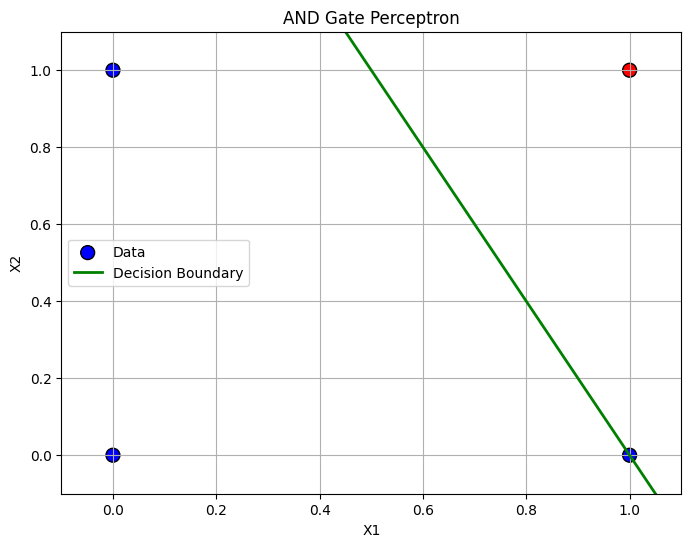

OR Gate Weights: [0.  0.1 0.1]


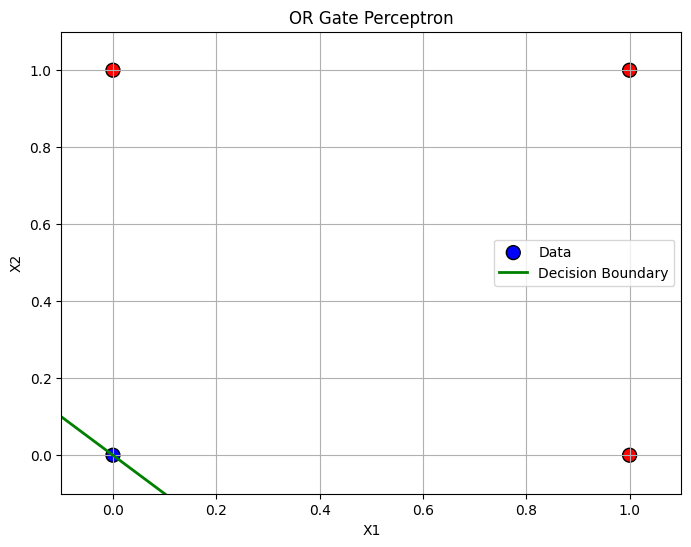

XOR Gate Weights: [ 0.1 -0.1  0. ]


<ipython-input-10-9c35a1a84683>:7: RuntimeWarning: divide by zero encountered in scalar divide
  y_vals = -(weights[1] / weights[2]) * x_vals - (weights[0] / weights[2])
<ipython-input-10-9c35a1a84683>:7: RuntimeWarning: invalid value encountered in subtract
  y_vals = -(weights[1] / weights[2]) * x_vals - (weights[0] / weights[2])


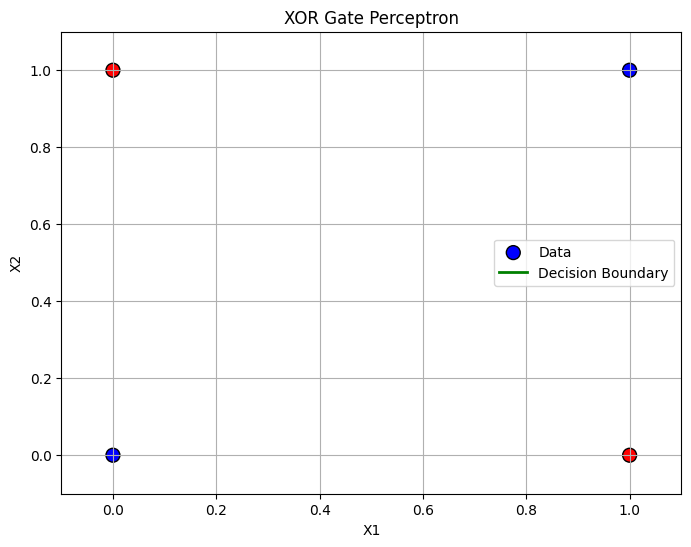

In [ ]:

# Main Program
gates = ["AND", "OR", "XOR"]
for gate in gates:
    X, y = generate_gate_data(gate)
    weights = perceptron(X, y, epochs=100, lr=0.1)
    print(f"{gate} Gate Weights: {weights}")
    plot_gate(X, y, weights, gate)